###### Importing the Libraries to this workspace

In [41]:
import numpy as np
import pandas
from cvxpy import *
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

###### Data Dimensions
data(20000,5)  
train_x(1000,4)  
train_y(1000,1)  
test_x(200,4)  
test_y(200,1)  

In [42]:
data = np.genfromtxt('Data/data.txt', delimiter=" ", usecols=[0,1,2,3,6])

# Training Data
train_x = data[:,0:4][1:1001]
train_y = data[:,4][1:1001]

# Test Data
test_x = data[:,0:4][1002:1202]
test_y = data[:,4][1002:1202]

# m =>1000 , n => 4
[m,n] = np.shape(train_x)

###### Constants and Variables  
D(1000 X 1000) is a diagonal matrix of vector train_y  
e(1000 X 1) is a vector of ones  
nu = scalar

(w , gamma , y) are the parameters that need to be optimised  
w = 4 X 1  
y = 1000 X 1  
gamma = scalar

In [43]:
D = np.diag(train_y)
e = np.ones(m)
w = Variable(n)
gamma = Variable(1)
y = Variable(m)
nu_min = 0.6

###### Finding the best regulirization paramter 

In [44]:
def thresh(yhat):
    if yhat >= 0:
        return 1
    return -1

In [45]:
cost_reg = {}
reg_params = [0.01,0.1,0.3,0.6,0.9,2,7,9,11,14,17,20,30]
for nu in reg_params:
    objective = Minimize(nu*e.T*y+.5*power(norm(w), 2))
    constraints = [D *(train_x*w - e*gamma) + y >= e, y >=0]
    prob = Problem(objective, constraints)
    prob.solve(),prob.status 
    ypred = test_x*w.value - gamma.value
    yhat = map(lambda x : thresh(x),ypred)
    cm = confusion_matrix(test_y, yhat)
    cm_sum = cm[0,0] + cm[1,1]
    cost_reg[nu]=prob.solve(),cm_sum

In [46]:
cost_reg

{0.01: (7.654546484219935, 160),
 0.1: (45.790615340678364, 188),
 0.3: (113.39136202822313, 187),
 0.6: (207.23175069380662, 189),
 0.9: (298.3162453998956, 189),
 2: (625.6957026888044, 188),
 7: (2090.8990043262997, 189),
 9: (2675.478131937883, 188),
 11: (3259.8770228925255, 188),
 14: (4136.1583725593255, 188),
 17: (5012.43696327259, 188),
 20: (5888.710171331081, 188),
 30: (8809.166969776054, 188)}

nu_min at 0.6 calssifys maximum points correctly

In [47]:
objective_p = Minimize(nu_min*e.T*y+.5*power(norm(w), 2))
constraints_p = [D *(train_x*w - e*gamma) + y >= e, y >=0]
prob_p = Problem(objective_p, constraints_p)
prob_p.solve(),prob_p.status 

(207.23175069380662, 'optimal')

In [48]:
y_p = test_x*w.value - gamma.value 
yhat = map(lambda x : thresh(x),y_p)

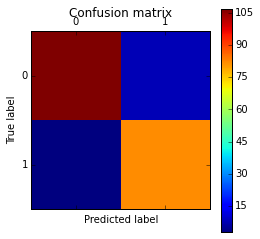

array([[107,   8],
       [  3,  82]])

In [49]:
%matplotlib inline

cm = confusion_matrix(test_y, yhat)

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
cm

In [50]:
TP = float(cm[0,0])
TN = float(cm[1,1])
FP = float(cm[1,0])
FN = float(cm[0,1])
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1= 2 * (precision * recall)/(precision+recall)
print "precision = ",precision
print "recall = ", recall
print "F1 score = ", F1

precision =  0.972727272727
recall =  0.930434782609
F1 score =  0.951111111111
